In [496]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import classification_report 
from sklearn import preprocessing

In [497]:
Comp_Data= pd.read_csv("Company_Data.csv")
Comp_Data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [498]:
Comp_Data.shape

(400, 11)

In [499]:
Comp_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [500]:
Comp_Data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [501]:
Comp_Data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [502]:
Comp_Data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


# Visualization

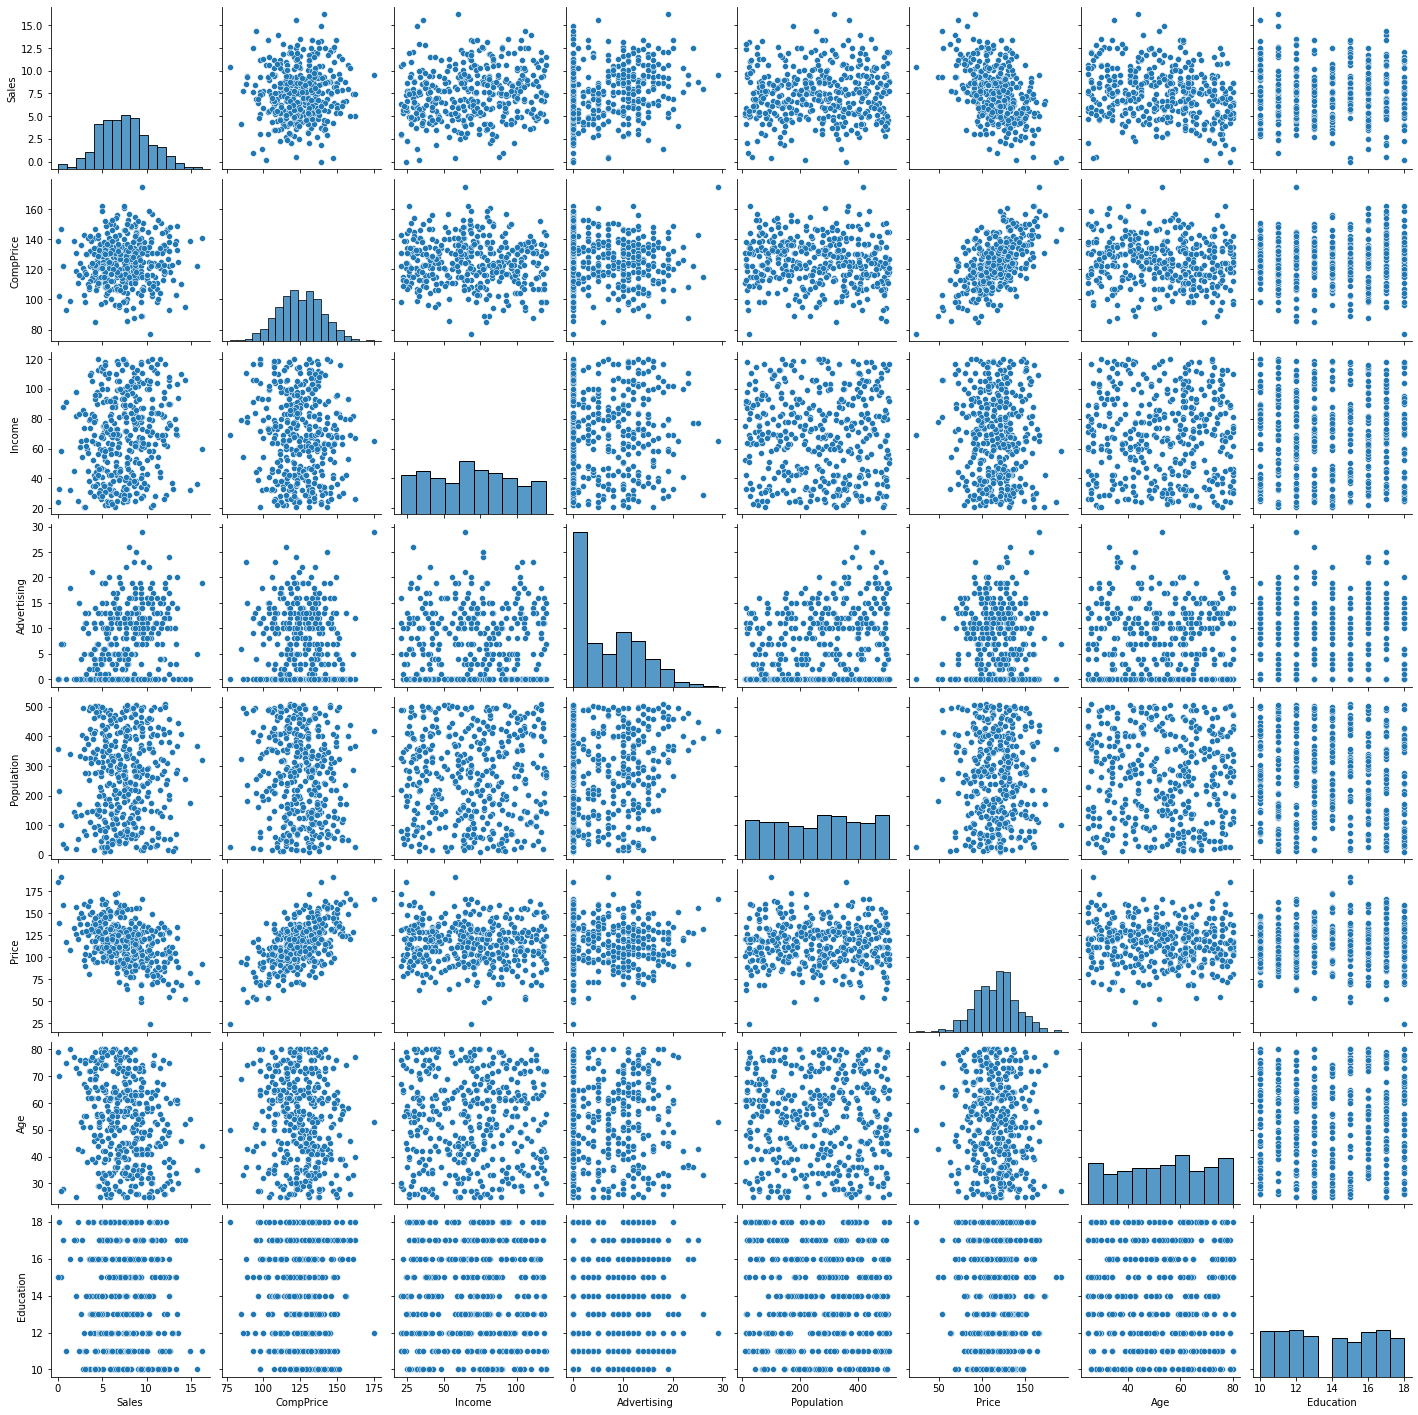

In [503]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Comp_Data)

E:\Annoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Income'>

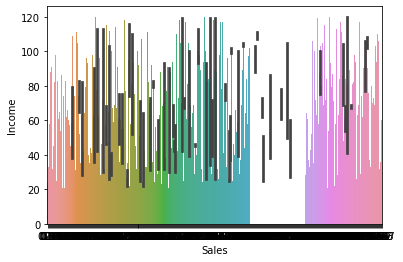

In [504]:
sns.barplot(Comp_Data['Sales'], Comp_Data['Income'])

E:\Annoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Income'>

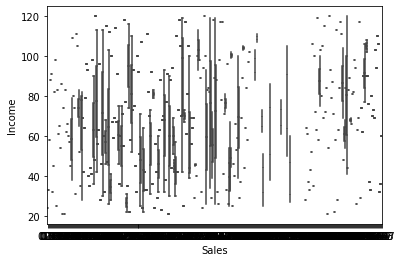

In [505]:
sns.boxplot(Comp_Data['Sales'], Comp_Data['Income'])

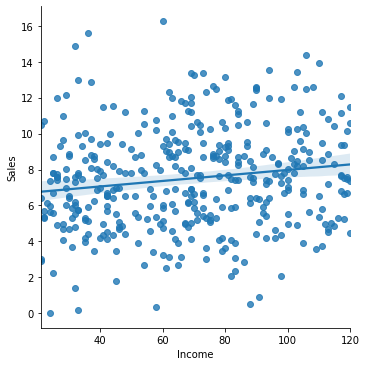

In [506]:
sns.lmplot(x='Income', y='Sales', data=Comp_Data)

E:\Annoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


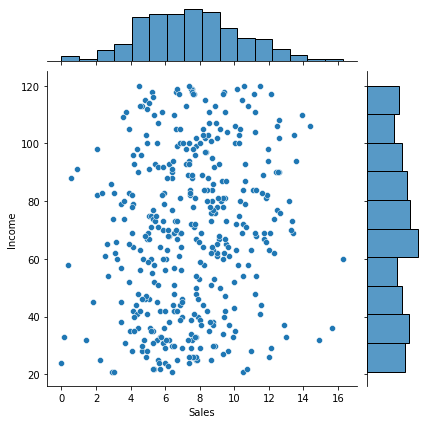

In [507]:
sns.jointplot(Comp_Data['Sales'], Comp_Data['Income'])

E:\Annoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Annoconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\Annoconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sales', ylabel='Income'>

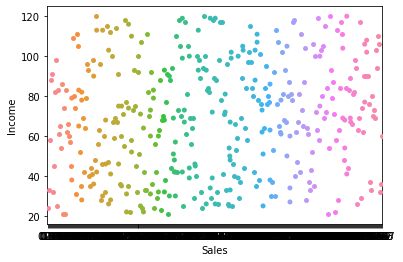

In [508]:
sns.swarmplot(Comp_Data['Sales'], Comp_Data['Income'])

E:\Annoconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

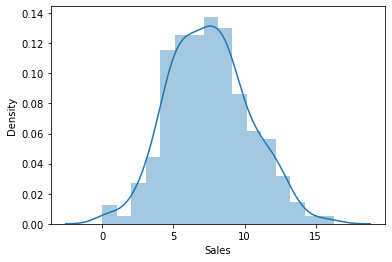

In [509]:
sns.distplot(Comp_Data['Sales'])

E:\Annoconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

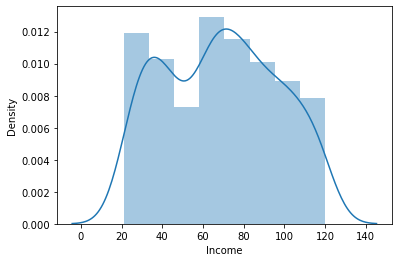

In [510]:
sns.distplot(Comp_Data['Income'])

# Preprocessing

In [863]:
Comp_Data.loc[Comp_Data["Sales"] <= 10.00,"Sales1"]="Not High"
Comp_Data.loc[Comp_Data["Sales"] >= 10.01,"Sales1"]="High"

In [864]:
Comp_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,Not High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Not High
4,4.15,141,64,3,340,128,0,38,13,1,0,Not High
5,10.81,124,113,13,501,72,0,78,16,0,1,High
6,6.63,115,105,0,45,108,2,71,15,1,0,Not High
7,11.85,136,81,15,425,120,1,67,10,1,1,High
8,6.54,132,110,0,108,124,2,76,10,0,0,Not High
9,4.69,132,113,0,131,124,2,76,17,0,1,Not High


In [865]:
label_encoder = preprocessing.LabelEncoder()
Comp_Data["ShelveLoc"] = label_encoder.fit_transform(Comp_Data["ShelveLoc"])
Comp_Data["Urban"] = label_encoder.fit_transform(Comp_Data["Urban"])
Comp_Data["US"] = label_encoder.fit_transform(Comp_Data["US"])
Comp_Data["Sales1"] = label_encoder.fit_transform(Comp_Data["Sales1"])

In [866]:
Comp_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
5,10.81,124,113,13,501,72,0,78,16,0,1,0
6,6.63,115,105,0,45,108,2,71,15,1,0,1
7,11.85,136,81,15,425,120,1,67,10,1,1,0
8,6.54,132,110,0,108,124,2,76,10,0,0,1
9,4.69,132,113,0,131,124,2,76,17,0,1,1


In [867]:
x=Comp_Data.iloc[:,1:11]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
5,124,113,13,501,72,0,78,16,0,1
6,115,105,0,45,108,2,71,15,1,0
7,136,81,15,425,120,1,67,10,1,1
8,132,110,0,108,124,2,76,10,0,0
9,132,113,0,131,124,2,76,17,0,1


In [915]:
y=Comp_Data["Sales1"]
y

0      1
1      0
2      0
3      1
4      1
5      0
6      1
7      0
8      1
9      1
10     1
11     0
12     1
13     0
14     0
15     1
16     1
17     0
18     0
19     1
20     1
21     0
22     1
23     1
24     0
25     0
26     1
27     1
28     1
29     1
30     0
31     1
32     1
33     1
34     1
35     0
36     1
37     1
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     1
46     0
47     1
48     1
49     0
50     1
51     1
52     1
53     1
54     1
55     1
56     0
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     0
69     1
70     1
71     1
72     1
73     0
74     1
75     1
76     0
77     1
78     1
79     1
80     1
81     1
82     0
83     1
84     1
85     1
86     1
87     0
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     0
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [916]:
Comp_Data['Sales1'].unique()

array([1, 0])

In [917]:
Comp_Data.Sales1.value_counts()

1    322
0     78
Name: Sales1, dtype: int64

In [918]:
colnames=list(Comp_Data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Sales1']

## Split Data into Train and Test

In [919]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

### Building Decision Tree Classifier using Entropy Criteria 

In [920]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Build Tree Model

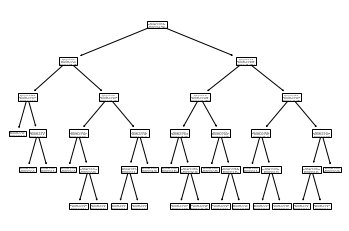

In [921]:
tree.plot_tree(model);

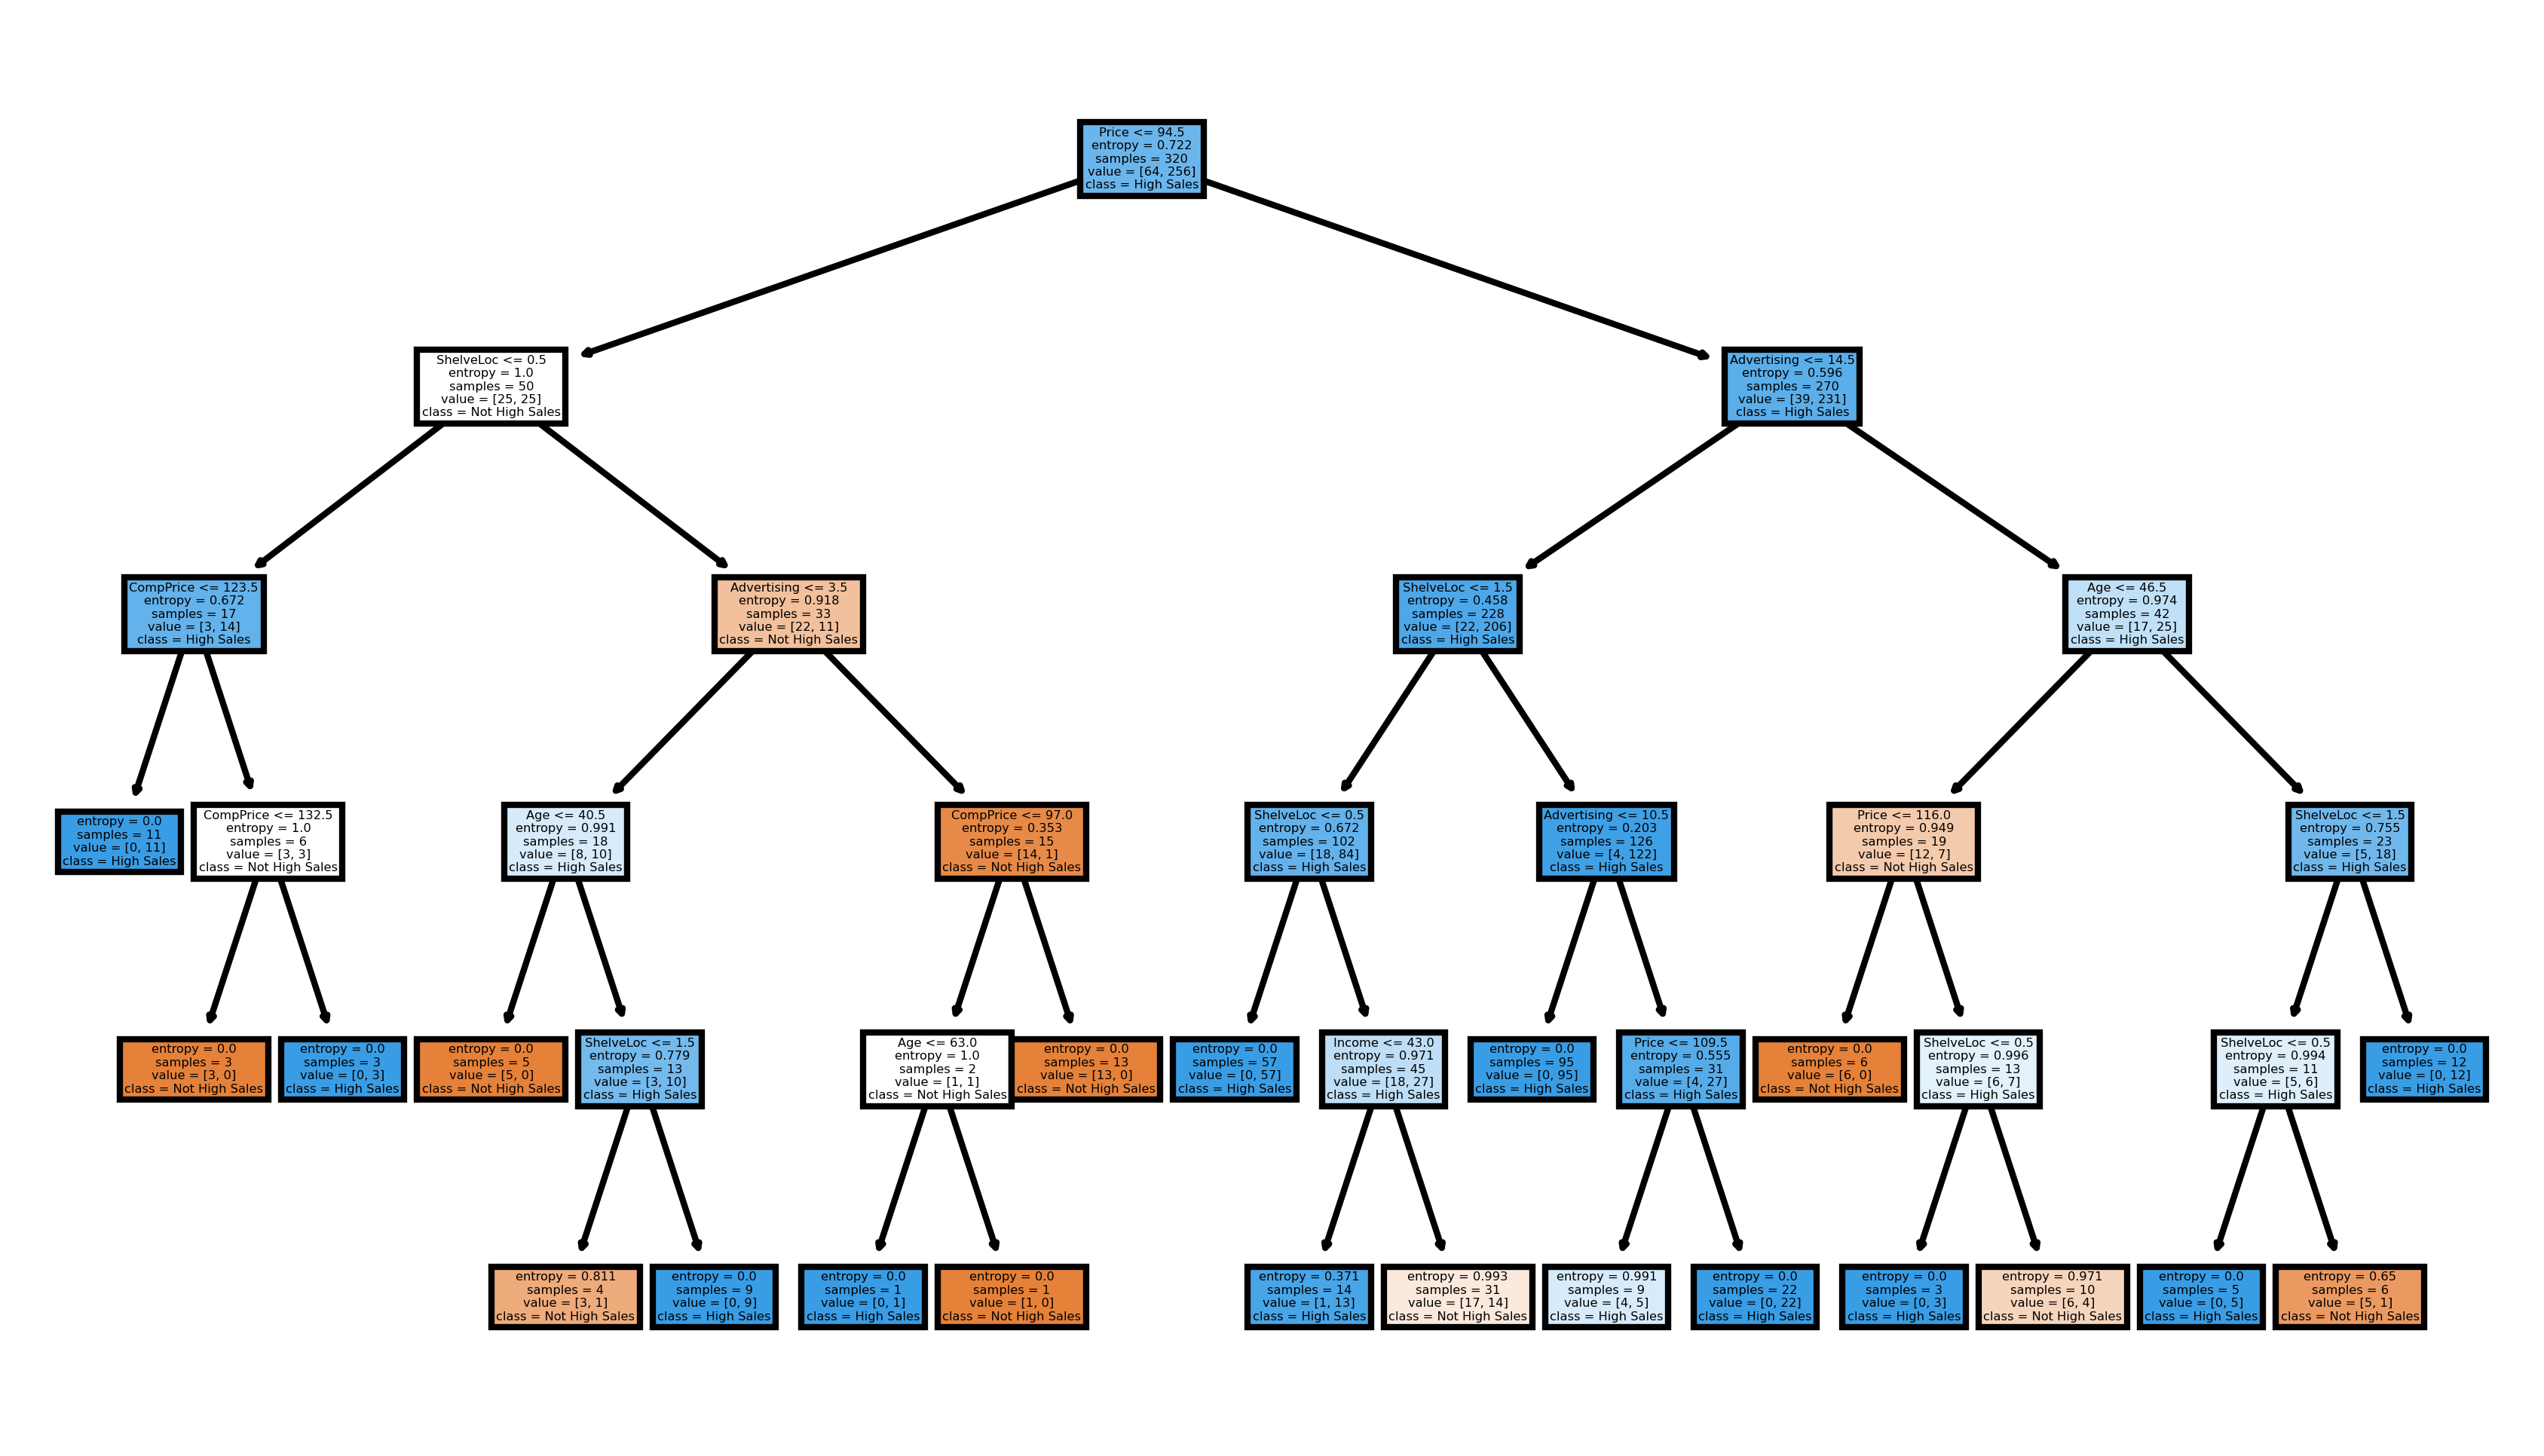

In [922]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Not High Sales', 'High Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,4), dpi=600)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [923]:
model.feature_importances_

array([0.08702489, 0.04552464, 0.18399636, 0.        , 0.19813331,
       0.39558251, 0.08973828, 0.        , 0.        , 0.        ])

In [924]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

ShelveLoc      0.395583
Price          0.198133
Advertising    0.183996
Age            0.089738
CompPrice      0.087025
Income         0.045525
Population     0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

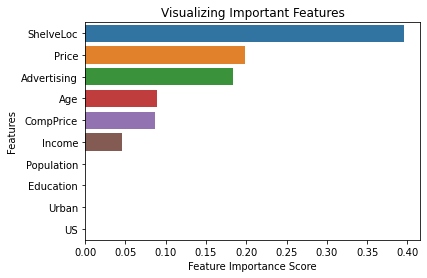

In [925]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [926]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1    56
0    24
dtype: int64

In [927]:
preds

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [928]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales1,,
0,10,4
1,14,52


In [929]:
# Accuracy 
np.mean(preds==y_test)

0.775

# Building Decision Tree Classifier (CART) using Gini Criteria

In [933]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [934]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [935]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.775

In [936]:
model.feature_importances_ 

array([0.08702489, 0.04552464, 0.18399636, 0.        , 0.19813331,
       0.39558251, 0.08973828, 0.        , 0.        , 0.        ])

#### Decision Tree Regression Example

In [937]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [938]:
array = Comp_Data.values
X = array[:,0:3]
y = array[:,-12]

## Spliting Dataset

In [939]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [940]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train) 

DecisionTreeRegressor()

# Find the accuracy

In [941]:
model.score(X_test,y_test)

0.9989019208266049